In [25]:
import numpy as np
import pandas as pd
import os 
import time
import deepdish.io as dd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

from svi import SVI
import models as m
import datasets as d

# Load and Prepare Data

In [2]:
data = dd.load("sequenced_data_for_VAE_lenght-160_stride-10.h5")

In [3]:
X,y = data["X"], data["y"]

In [4]:
X.shape

torch.Size([83680, 160])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=666)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
train = d.H_alphaSequences(X_train, y_train)
test = d.H_alphaSequences(X_test, y_test)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

# Model setup

In [13]:
torch.cuda.is_available()

True

In [14]:
torch.cuda.get_device_name()

'GeForce GTX 1070'

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [52]:
model_name = "DeepConvVAE_ELU_NLL_250ep_lr-{1e-3, 1e-4}_bs-300"

In [17]:
deepmodel = m.DeepConvVAE_ELU(original_dim=160, latent_dim=15) #m.DeepConvVAE_ReLU(original_dim=160, latent_dim=15)
svi = SVI(
        vae_model=deepmodel,
        optimizer=torch.optim.Adam(deepmodel.parameters(), lr=1e-3),
        loss_function="GaussianNLL",
        verbose=True
        )

cuda:0


In [18]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:35.7833, validation_loss:-58.5844
Epoch [2/50], average_loss:-93.0438, validation_loss:-116.4380
Epoch [3/50], average_loss:-120.5182, validation_loss:-127.6403
Epoch [4/50], average_loss:-134.4027, validation_loss:-119.7781
Epoch [5/50], average_loss:-143.2315, validation_loss:-137.5528
Epoch [6/50], average_loss:-145.5900, validation_loss:-152.7719
Epoch [7/50], average_loss:-151.5248, validation_loss:-152.0373
Epoch [8/50], average_loss:-155.4532, validation_loss:-156.0308
Epoch [9/50], average_loss:-157.8982, validation_loss:-154.0104
Epoch [10/50], average_loss:-158.9322, validation_loss:-159.5566
Epoch [11/50], average_loss:-161.1133, validation_loss:-155.6082
Epoch [12/50], average_loss:-161.0639, validation_loss:-157.1270
Epoch [13/50], average_loss:-161.2826, validation_loss:-164.2066
Epoch [14/50], average_loss:-163.3914, validation_loss:-158.9029
Epoch [15/50], average_loss:-166.2561, validation_loss:-164.9397
Epoch [16/50], average_loss:-167.5721,

In [19]:
for g in svi.optimizer.param_groups:
    g['lr'] = 1e-4
    print("changed")

changed


In [ ]:
#svi.optimizer=torch.optim.Adam(deepmodel.parameters(), lr=1e-4)

In [20]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-214.6679, validation_loss:-213.9832
Epoch [2/50], average_loss:-215.8638, validation_loss:-214.1458
Epoch [3/50], average_loss:-215.9621, validation_loss:-214.3214
Epoch [4/50], average_loss:-216.1820, validation_loss:-214.4244
Epoch [5/50], average_loss:-216.1884, validation_loss:-214.3400
Epoch [6/50], average_loss:-216.3664, validation_loss:-214.3484
Epoch [7/50], average_loss:-216.2165, validation_loss:-214.4481
Epoch [8/50], average_loss:-216.3750, validation_loss:-214.5037
Epoch [9/50], average_loss:-216.3033, validation_loss:-214.7544
Epoch [10/50], average_loss:-216.3927, validation_loss:-214.4727
Epoch [11/50], average_loss:-216.5529, validation_loss:-214.8398
Epoch [12/50], average_loss:-216.5698, validation_loss:-214.5442
Epoch [13/50], average_loss:-216.5870, validation_loss:-214.8294
Epoch [14/50], average_loss:-216.7579, validation_loss:-214.7600
Epoch [15/50], average_loss:-216.7242, validation_loss:-215.0040
Epoch [16/50], average_loss:-216.7

In [32]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-218.5411, validation_loss:-216.5927
Epoch [2/50], average_loss:-218.6296, validation_loss:-216.7532
Epoch [3/50], average_loss:-218.6020, validation_loss:-216.8040
Epoch [4/50], average_loss:-218.5104, validation_loss:-217.0292
Epoch [5/50], average_loss:-218.7265, validation_loss:-216.9209
Epoch [6/50], average_loss:-218.8395, validation_loss:-217.0661
Epoch [7/50], average_loss:-218.8295, validation_loss:-216.4229
Epoch [8/50], average_loss:-218.7907, validation_loss:-217.0304
Epoch [9/50], average_loss:-219.0278, validation_loss:-217.1037
Epoch [10/50], average_loss:-218.8800, validation_loss:-217.0650
Epoch [11/50], average_loss:-218.9211, validation_loss:-216.9924
Epoch [12/50], average_loss:-219.0283, validation_loss:-216.8656
Epoch [13/50], average_loss:-219.0768, validation_loss:-217.2668
Epoch [14/50], average_loss:-219.2335, validation_loss:-217.0610
Epoch [15/50], average_loss:-219.1642, validation_loss:-217.3266
Epoch [16/50], average_loss:-219.0

In [41]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-220.3304, validation_loss:-218.1347
Epoch [2/50], average_loss:-220.4329, validation_loss:-218.5131
Epoch [3/50], average_loss:-220.3984, validation_loss:-218.4338
Epoch [4/50], average_loss:-220.3044, validation_loss:-218.3418
Epoch [5/50], average_loss:-220.2851, validation_loss:-218.0424
Epoch [6/50], average_loss:-220.3623, validation_loss:-218.5558
Epoch [7/50], average_loss:-220.4808, validation_loss:-218.6164
Epoch [8/50], average_loss:-220.4665, validation_loss:-218.4994
Epoch [9/50], average_loss:-220.6193, validation_loss:-218.5362
Epoch [10/50], average_loss:-220.4445, validation_loss:-218.5211
Epoch [11/50], average_loss:-220.5645, validation_loss:-218.5332
Epoch [12/50], average_loss:-220.5551, validation_loss:-218.4662
Epoch [13/50], average_loss:-220.5061, validation_loss:-218.5894
Epoch [14/50], average_loss:-220.6304, validation_loss:-218.3992
Epoch [15/50], average_loss:-220.7496, validation_loss:-218.3053
Epoch [16/50], average_loss:-220.8

In [51]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-221.3519, validation_loss:-219.2794
Epoch [2/50], average_loss:-221.6179, validation_loss:-219.5616
Epoch [3/50], average_loss:-221.6216, validation_loss:-219.4883
Epoch [4/50], average_loss:-221.6827, validation_loss:-219.6506
Epoch [5/50], average_loss:-221.6991, validation_loss:-219.2854
Epoch [6/50], average_loss:-221.6652, validation_loss:-219.1728
Epoch [7/50], average_loss:-221.7671, validation_loss:-219.7187
Epoch [8/50], average_loss:-221.7815, validation_loss:-219.6882
Epoch [9/50], average_loss:-221.5942, validation_loss:-219.8372
Epoch [10/50], average_loss:-221.7712, validation_loss:-219.6405
Epoch [11/50], average_loss:-221.7956, validation_loss:-219.7763
Epoch [12/50], average_loss:-221.9042, validation_loss:-219.6471
Epoch [13/50], average_loss:-221.7308, validation_loss:-219.2527
Epoch [14/50], average_loss:-221.7524, validation_loss:-219.5367
Epoch [15/50], average_loss:-221.9485, validation_loss:-219.5784
Epoch [16/50], average_loss:-221.8

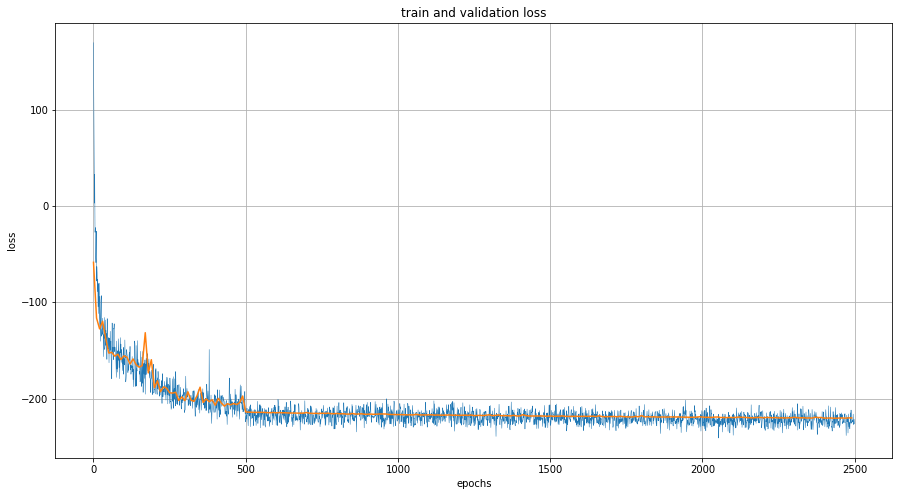

In [53]:
plt.figure(figsize=(15,8))
plt.title("train and validation loss")
epoch_axis = np.arange(len(svi.loss_history["train"]))
plt.plot(epoch_axis, np.array(svi.loss_history["train"]), lw=0.5) #np.arange(len(svi.loss_history["validation"]))*10
plt.plot(np.arange(len(svi.loss_history["validation"]))*10, svi.loss_history["validation"])
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [54]:
torch.save(svi.model, f"VAE_saves_and_logs/{model_name}.pt")
torch.save(svi.optimizer, f"VAE_saves_and_logs/{model_name}_optimizer.pt")
dd.save(f"VAE_saves_and_logs/{model_name}_loss_history.h5", svi.loss_history)

# Evaluation

cuda:0


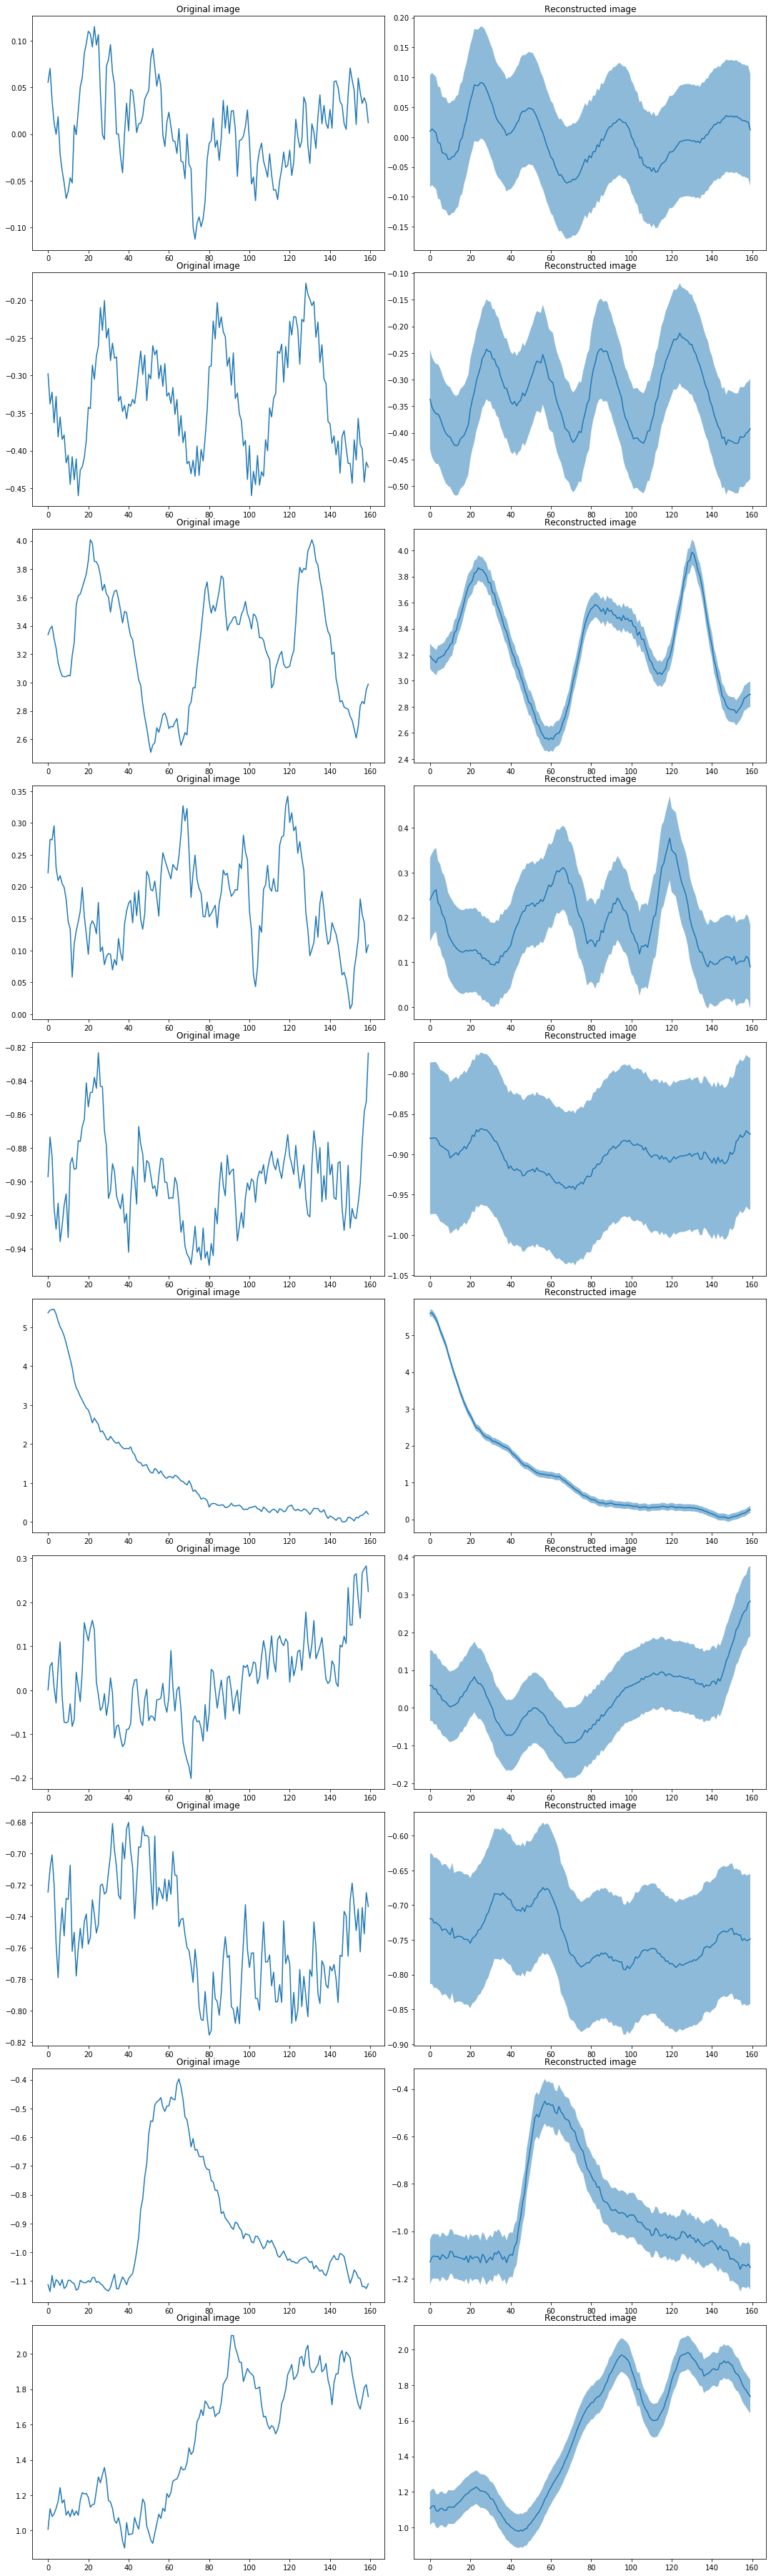

In [26]:
# epoch 100
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


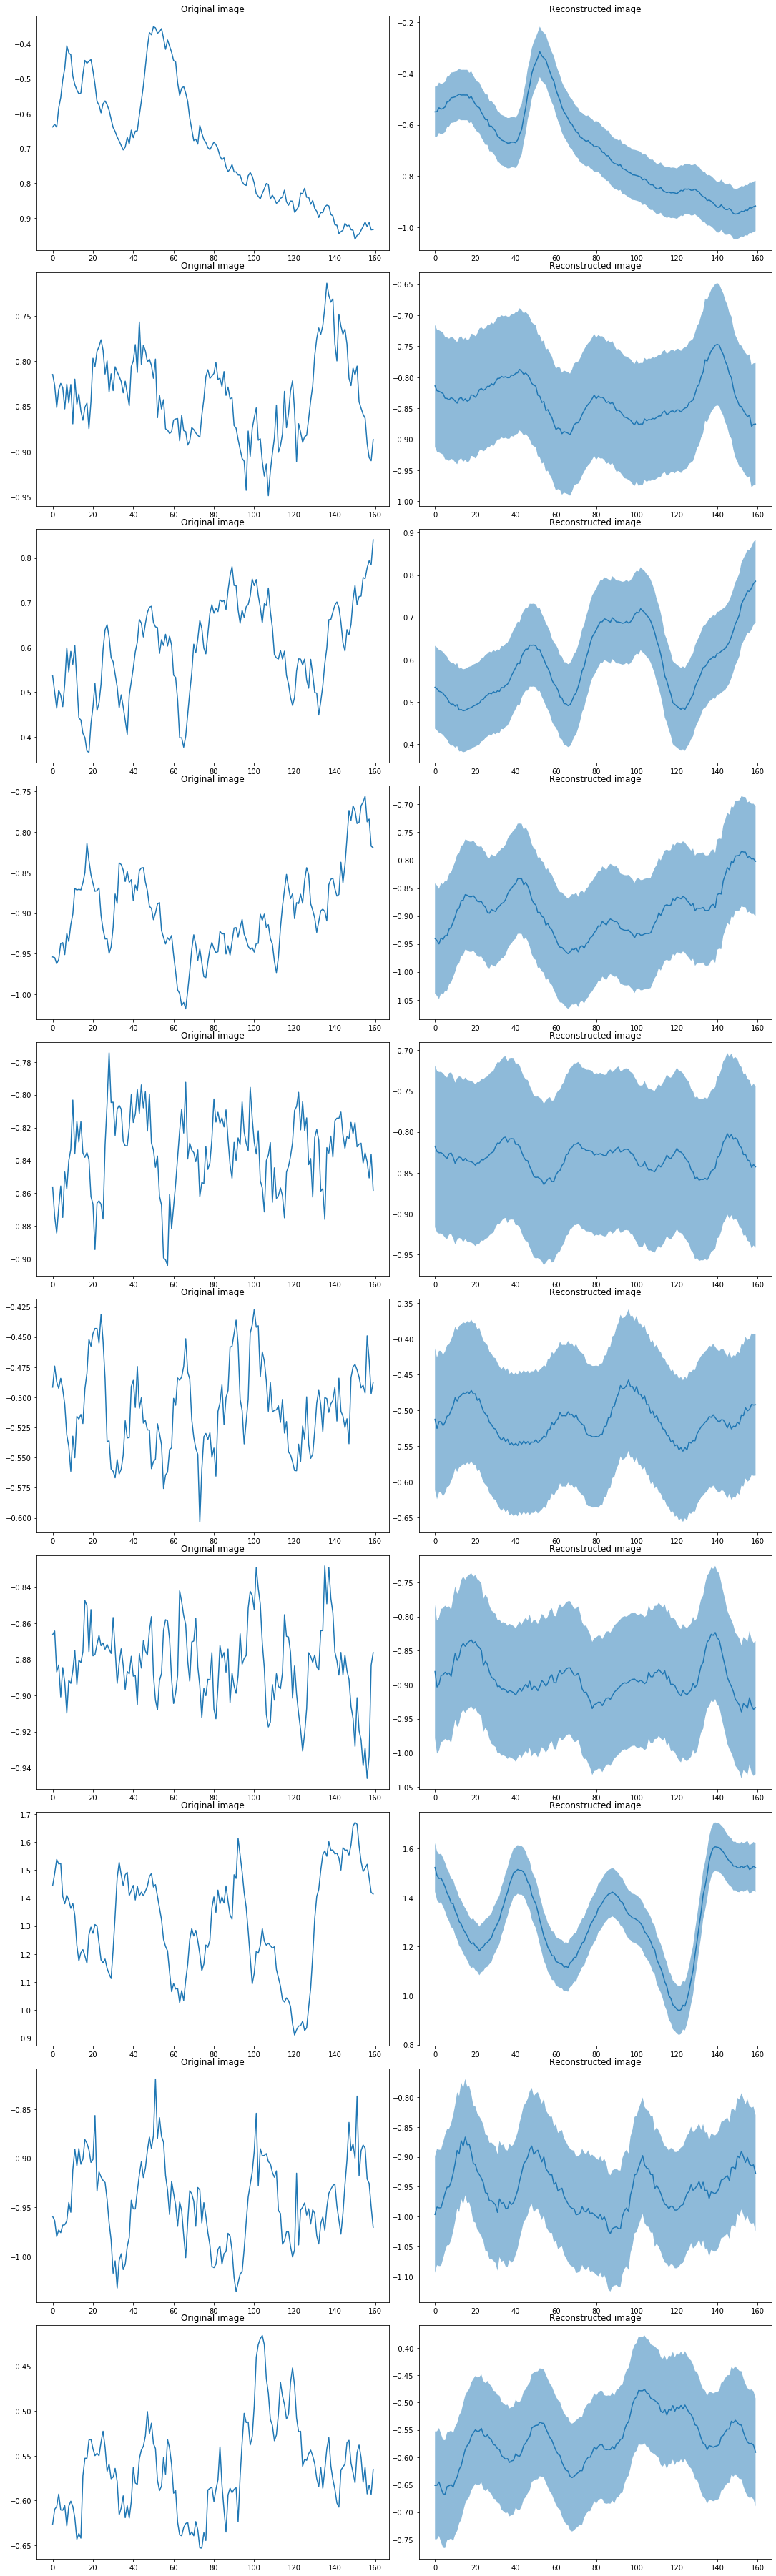

In [36]:
# epoch 150
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


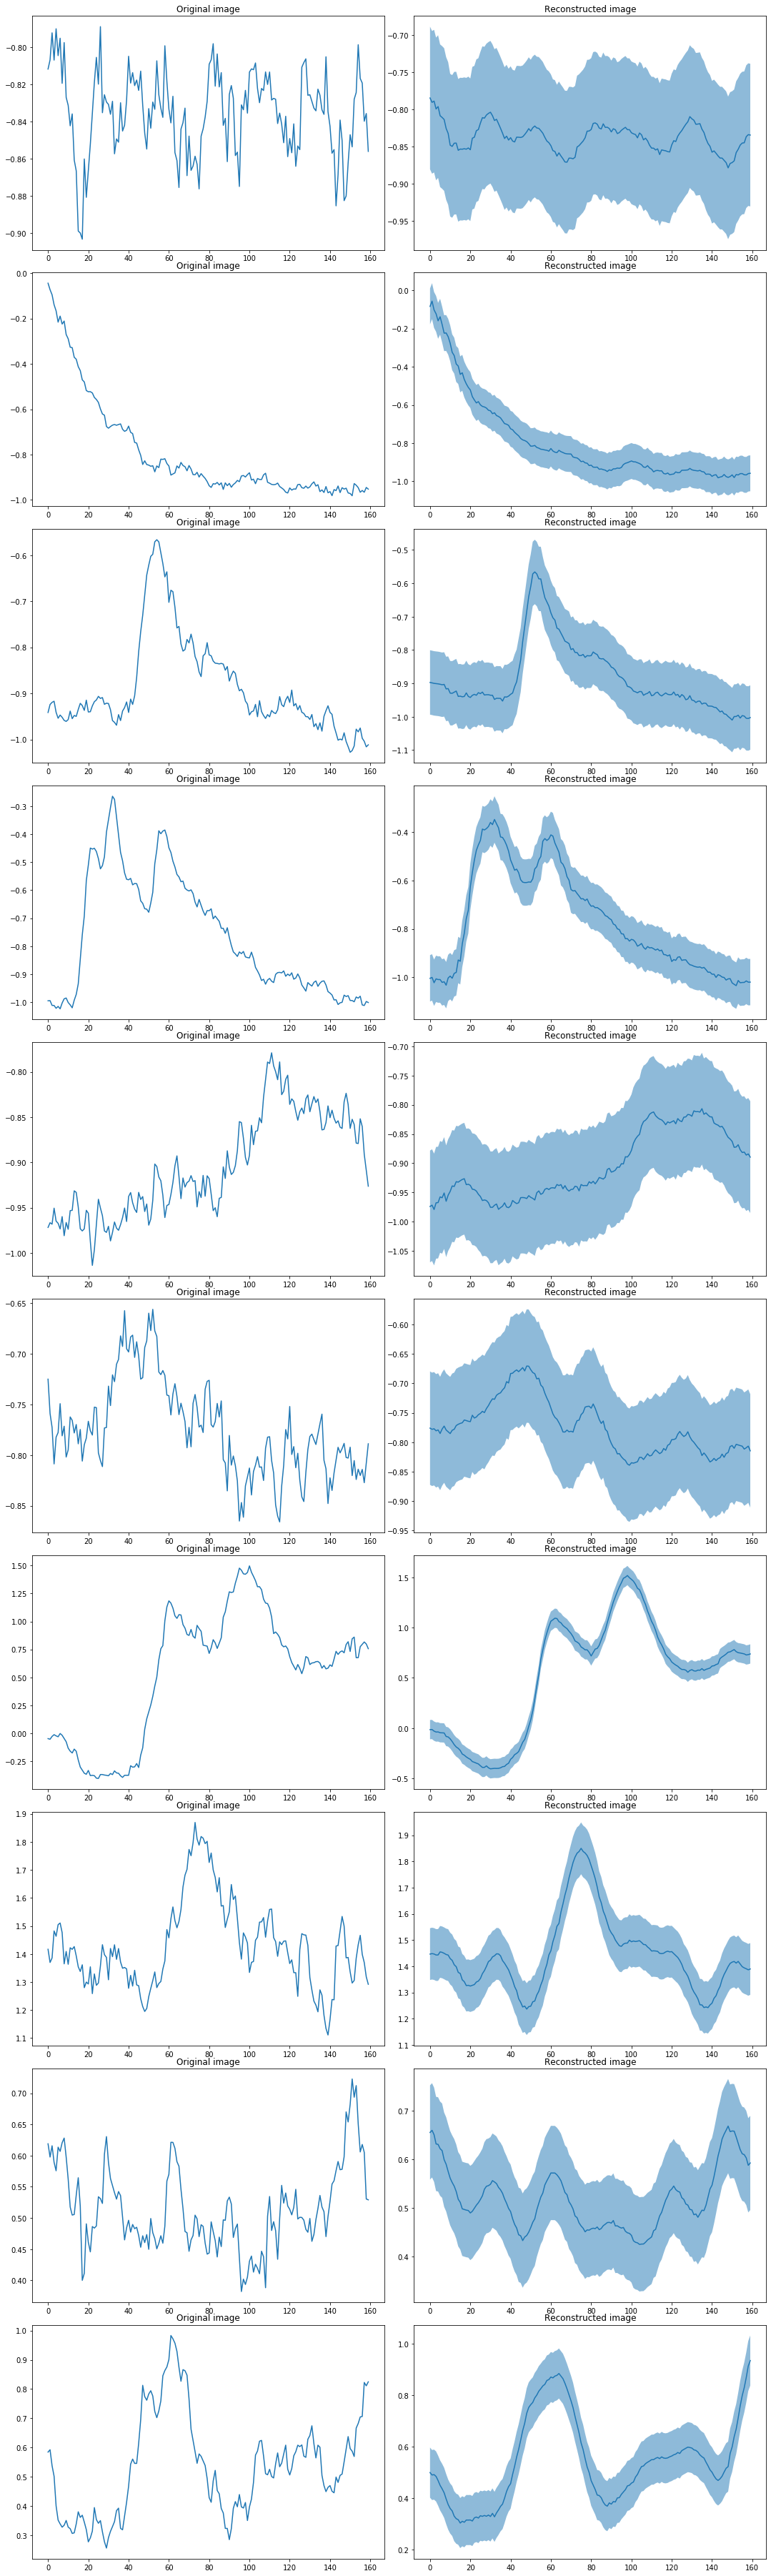

In [45]:
# epoch 200
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


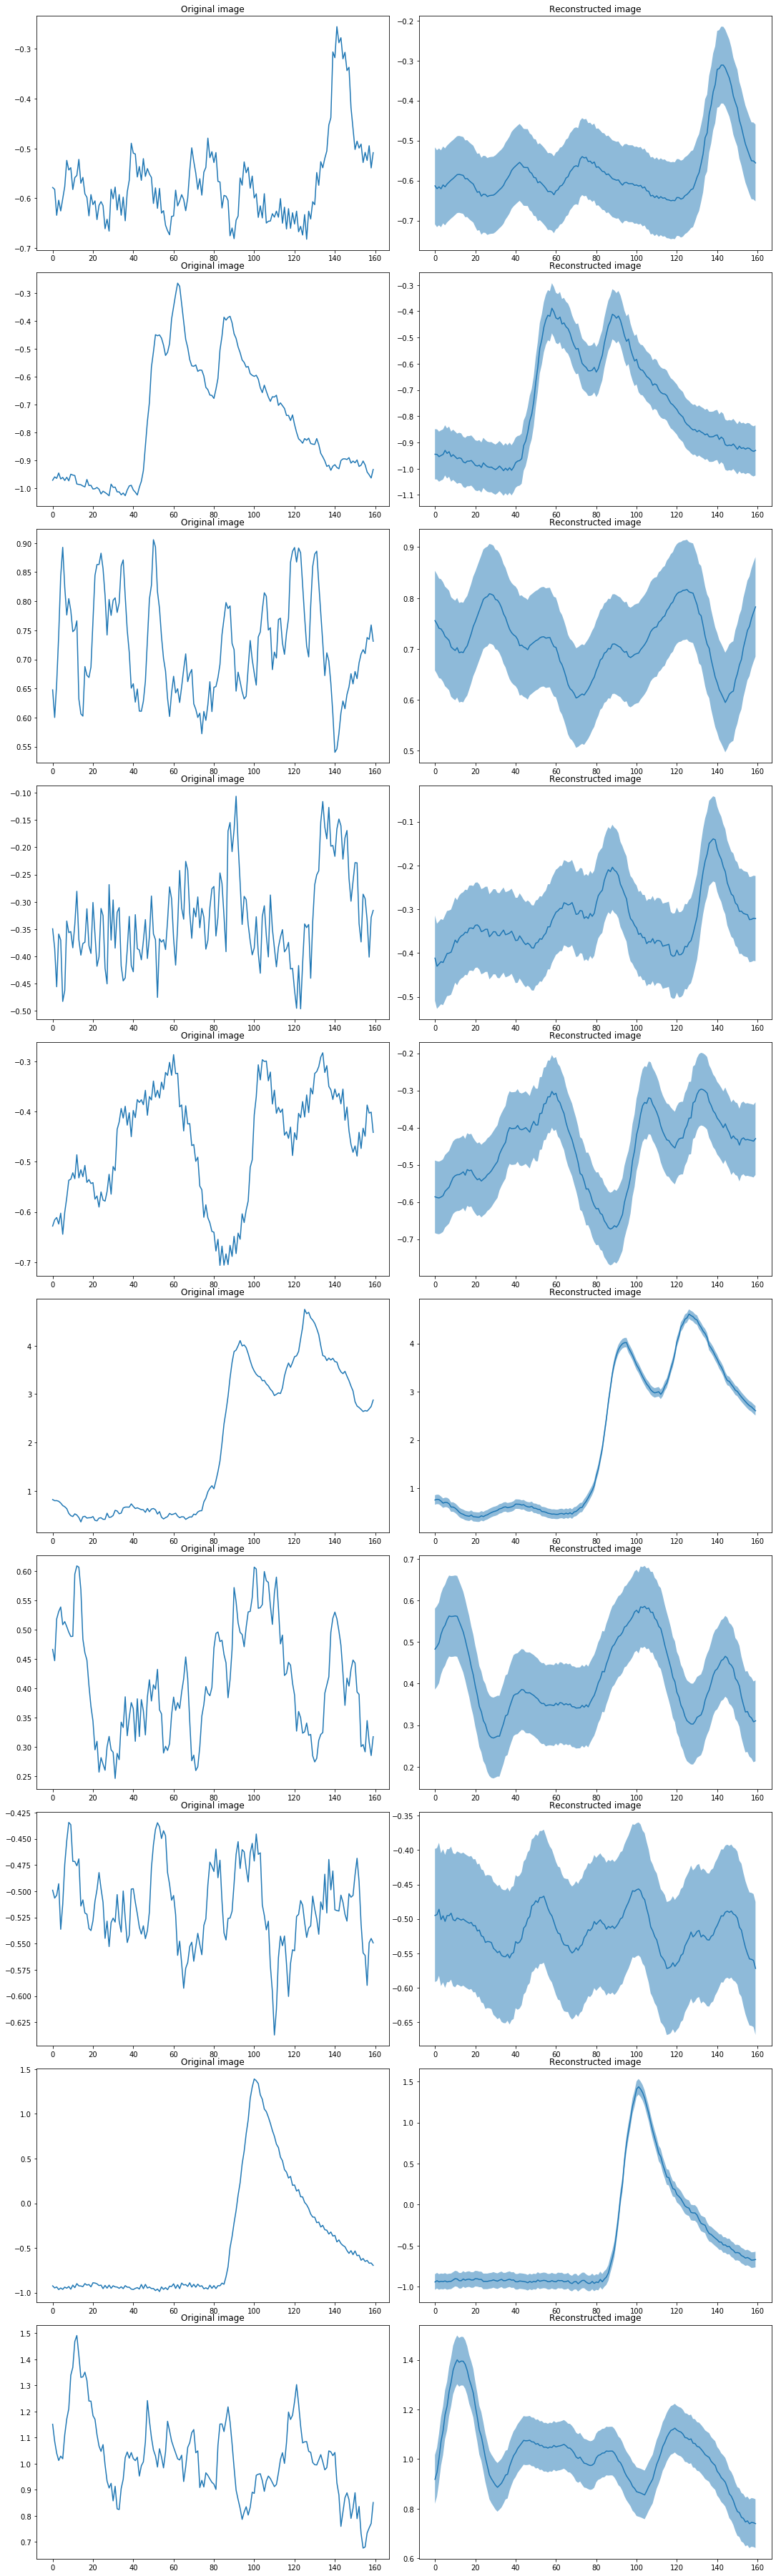

In [46]:
# epoch 200
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


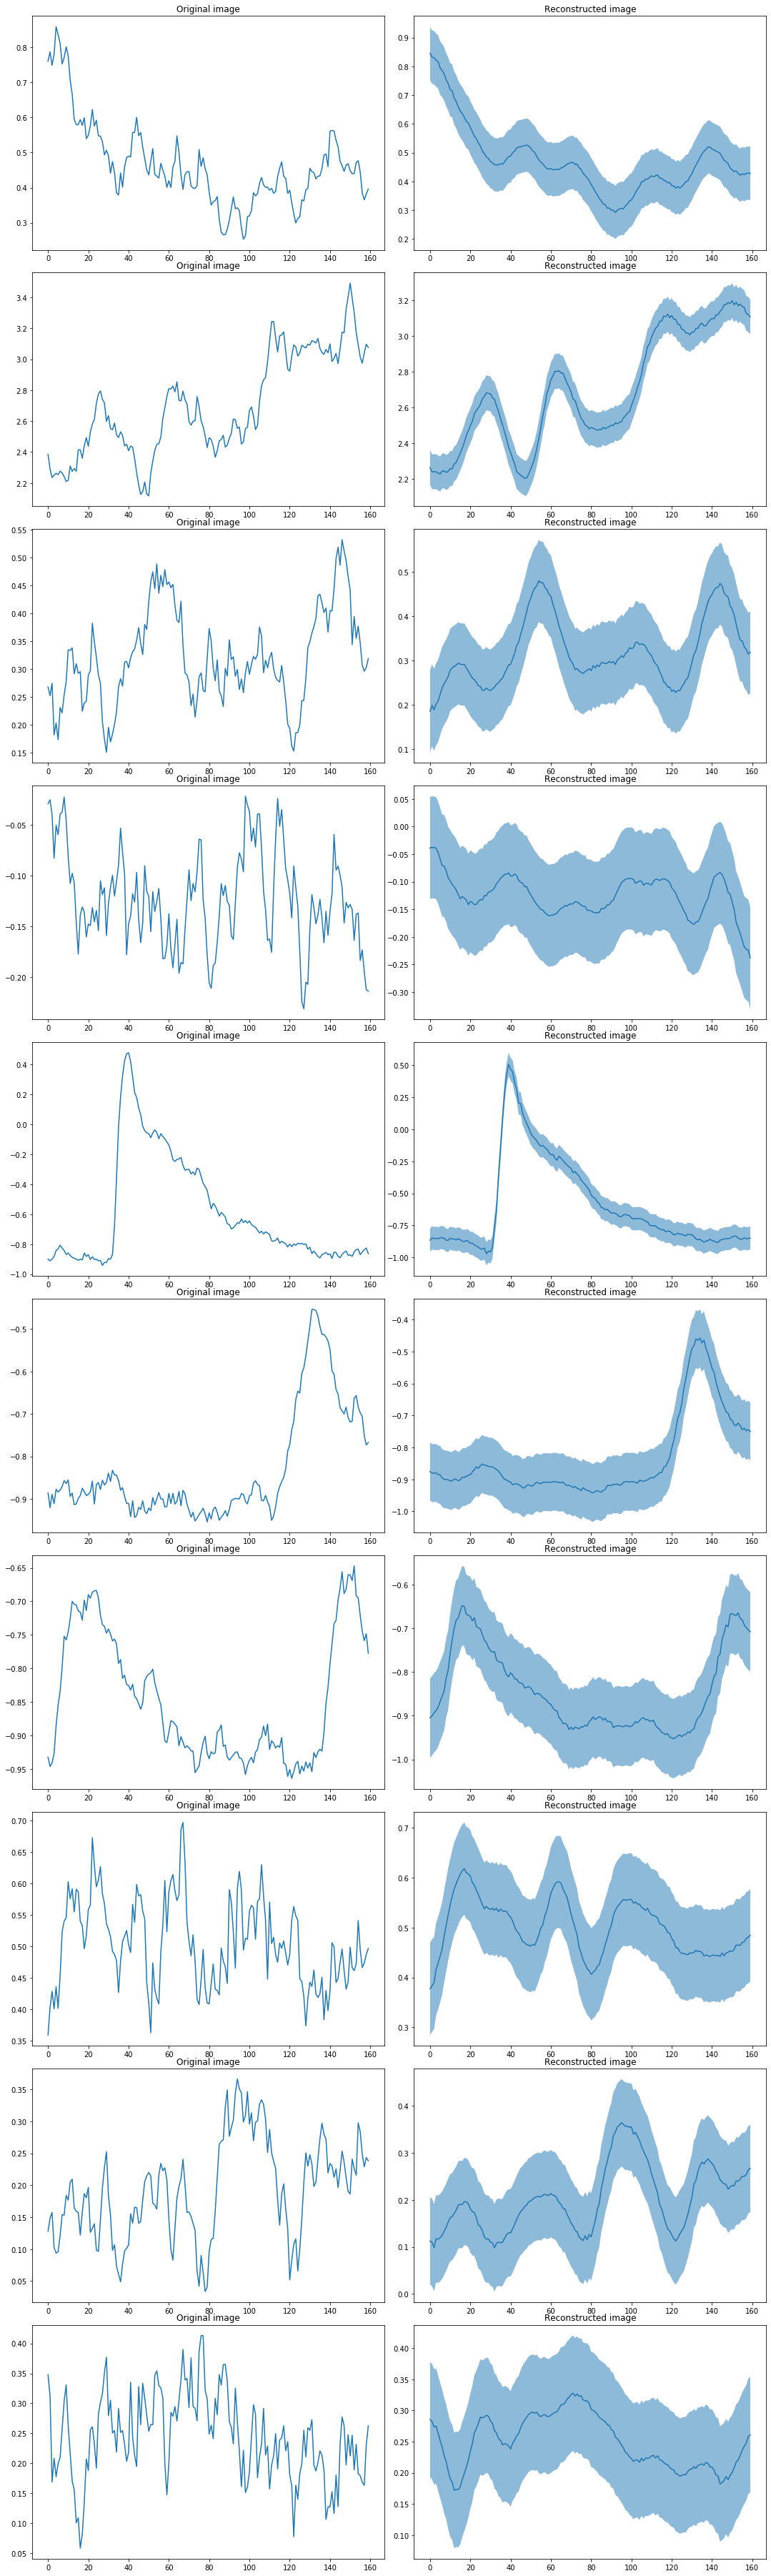

In [55]:
# epoch 250
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


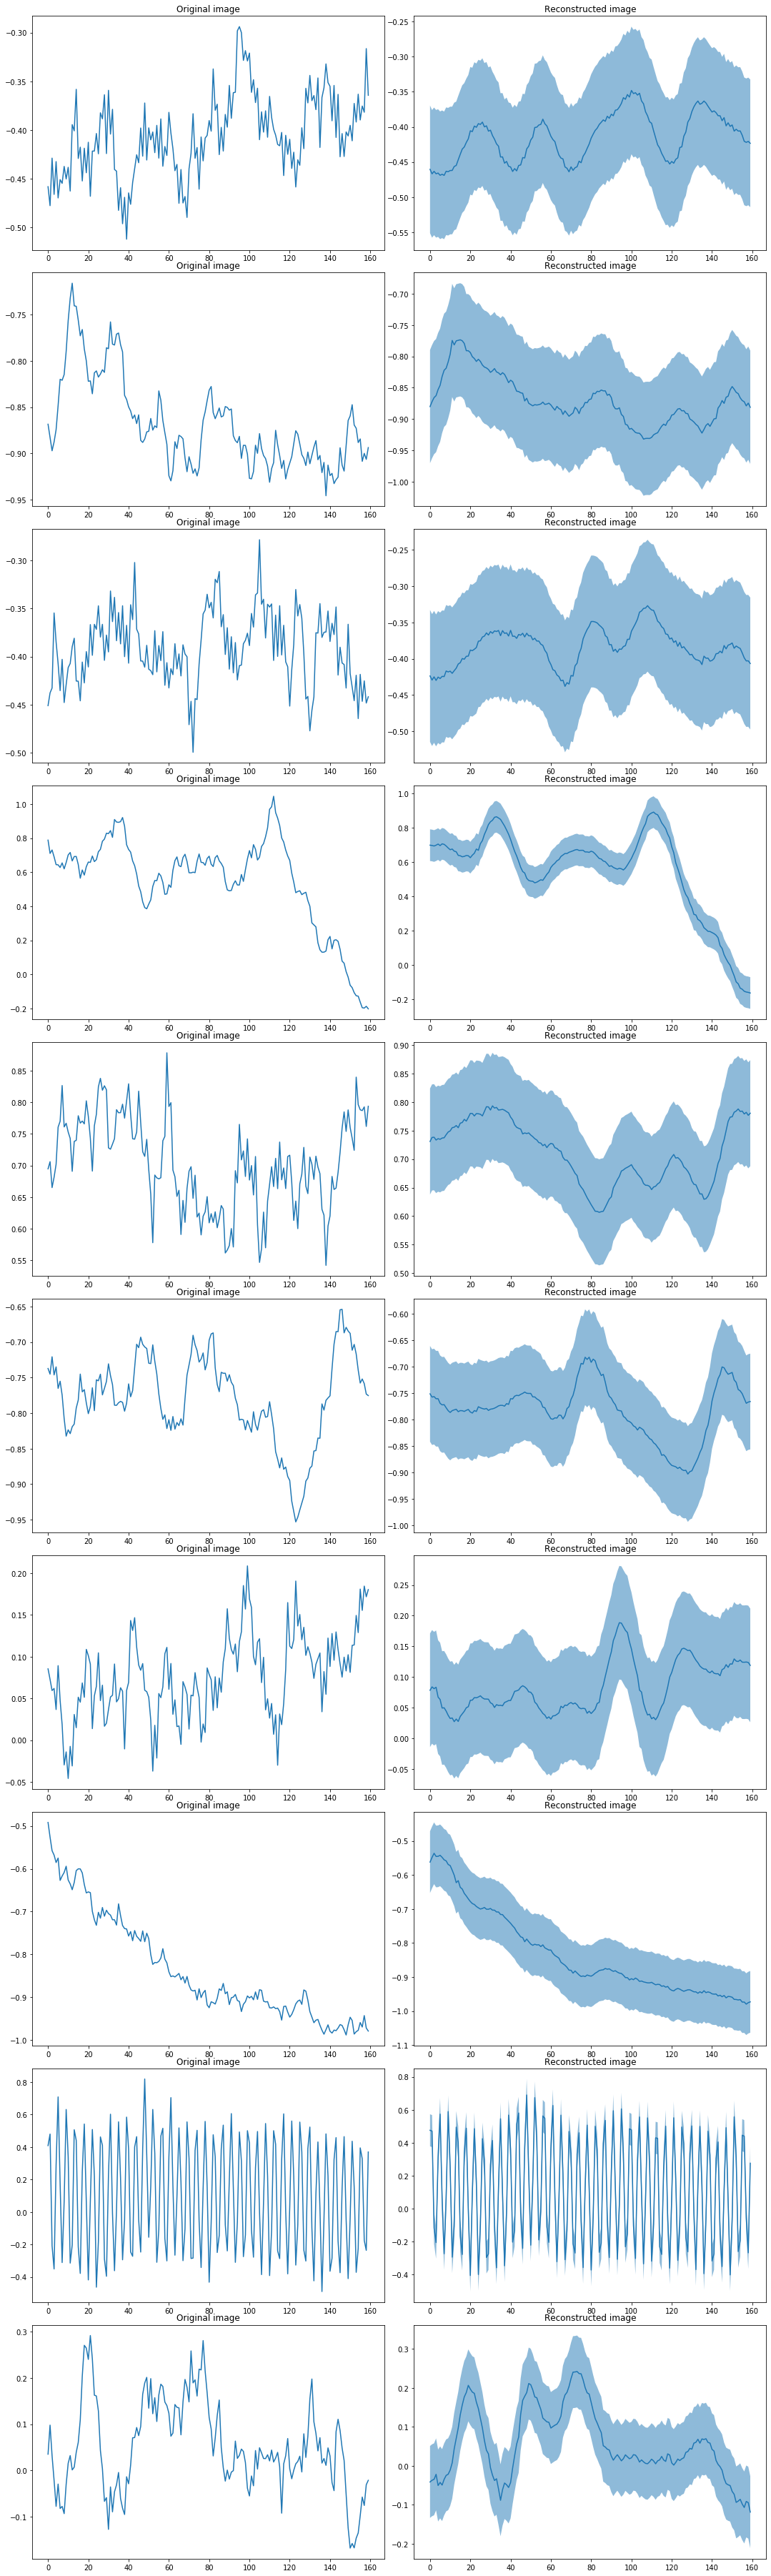

In [56]:
# epoch 250
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

# Load Model

In [57]:
mod = torch.load(f"VAE_saves_and_logs/{model_name}.pt")

In [58]:
mod.eval()

DeepConvVAE_ELU(
  (encoder): Sequential(
    (0): Reshape()
    (1): Conv1d(1, 16, kernel_size=(6,), stride=(2,))
    (2): ELU(alpha=1.0)
    (3): Conv1d(16, 32, kernel_size=(4,), stride=(2,))
    (4): ELU(alpha=1.0)
    (5): Conv1d(32, 64, kernel_size=(4,), stride=(2,))
    (6): ELU(alpha=1.0)
    (7): Flatten()
    (8): VariationalLayer(
      (mu): Linear(in_features=1152, out_features=15, bias=True)
      (rho): Linear(in_features=1152, out_features=15, bias=True)
      (softplus): Softplus(beta=1, threshold=20)
    )
  )
  (decoder): Sequential(
    (0): Linear(in_features=15, out_features=1152, bias=True)
    (1): ELU(alpha=1.0)
    (2): Reshape()
    (3): ConvTranspose1d(64, 32, kernel_size=(4,), stride=(2,))
    (4): ELU(alpha=1.0)
    (5): ConvTranspose1d(32, 16, kernel_size=(4,), stride=(2,))
    (6): ELU(alpha=1.0)
    (7): ConvTransposeDecoderOutput(
      (mu): ConvTranspose1d(16, 1, kernel_size=(6,), stride=(2,))
      (rho): Linear(in_features=1248, out_features=1, bias

In [59]:
z, mu, sigma = mod.encoder(X.to(device))

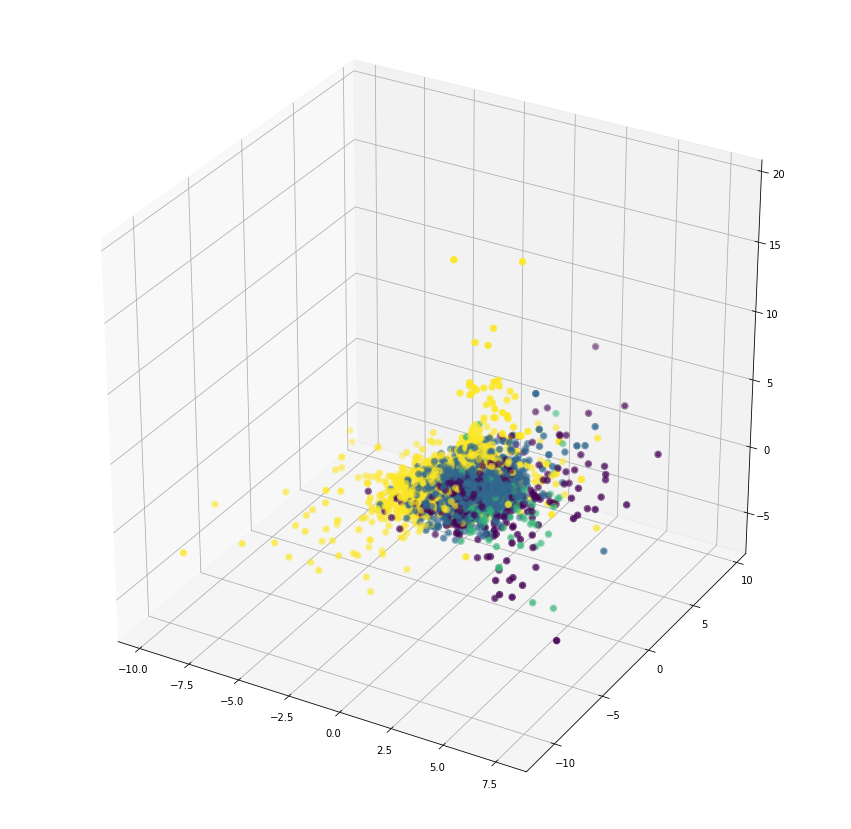

In [60]:
#epoch 250
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

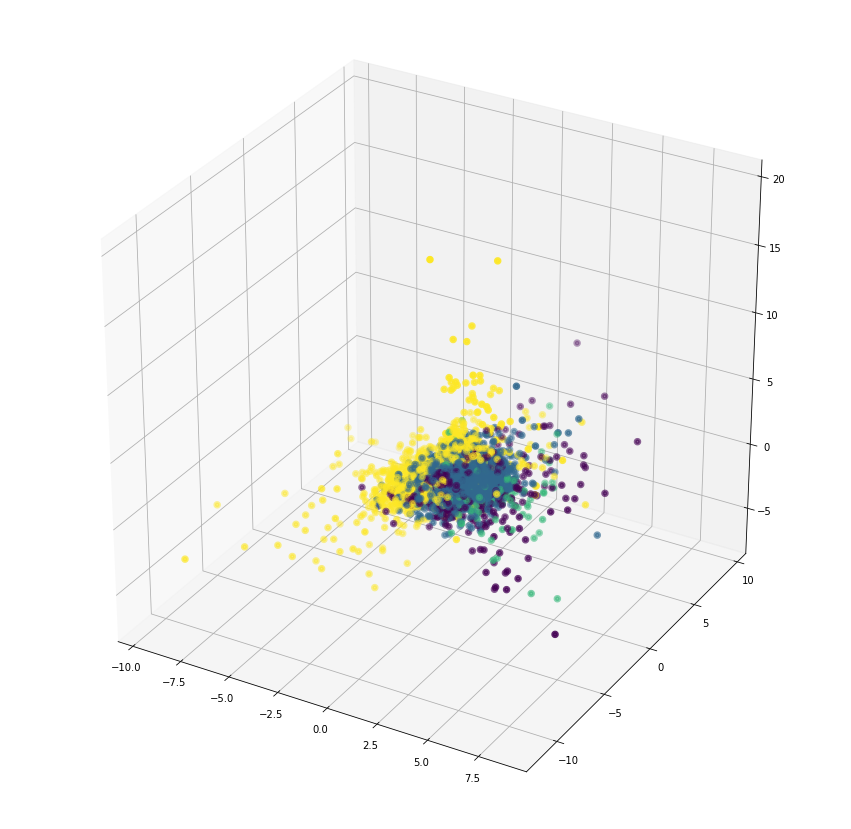

In [50]:
#epoch 200
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

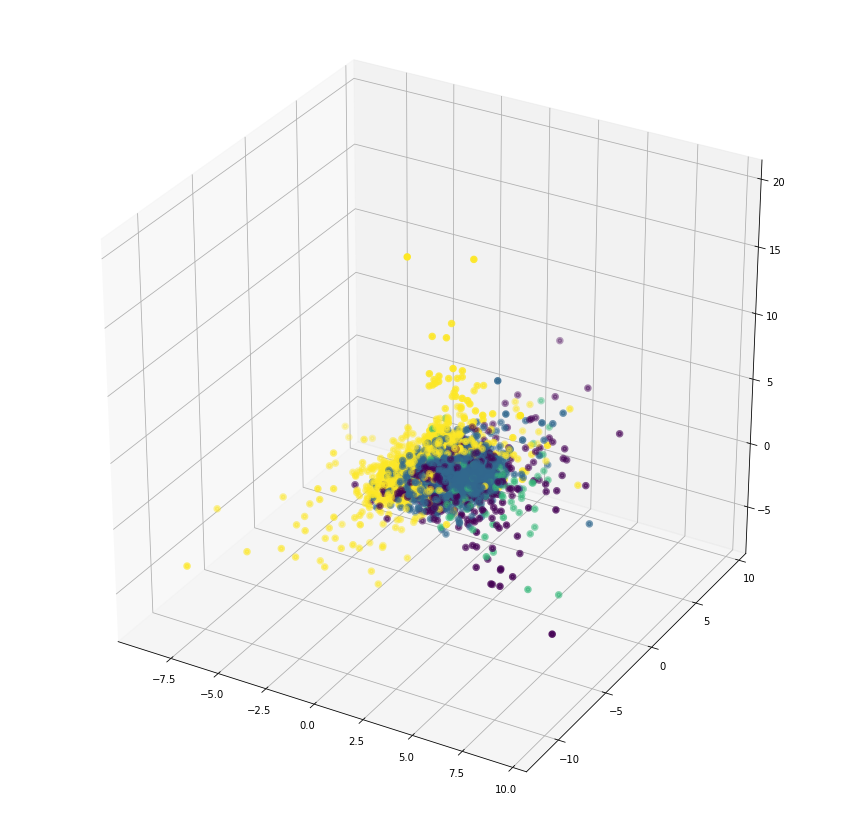

In [40]:
#epoch 150
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

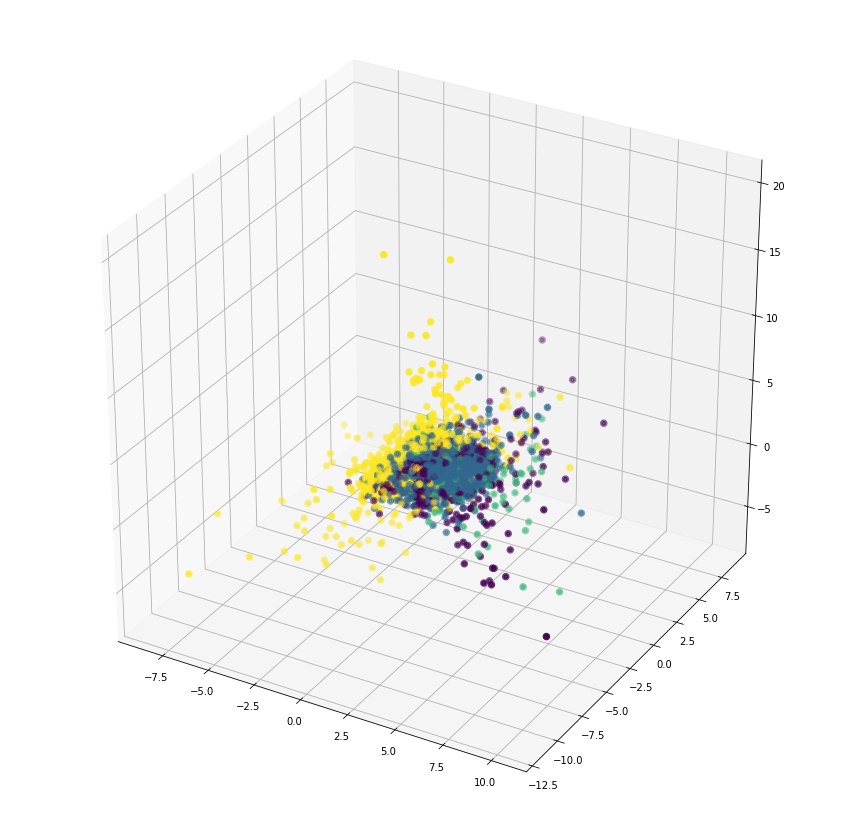

In [30]:
#epoch 100
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

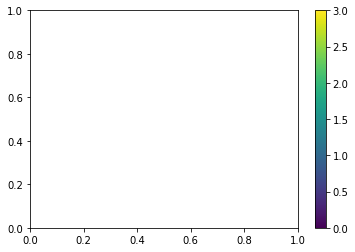

In [31]:
# když přidám colorbar k obrázku tak se nehezky deformuje, tak je tady zvlášť
plt.colorbar(sc, shrink=1)

In [ ]:
test.y